In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset into a DataFrame
df = pd.read_excel('/home/chemweno/Desktop/TATA Data Project/cleaned_data.xlsx')
df.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
530686    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
530687    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
530688    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
530689    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
530690    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

In [3]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [14]:
df['CustomerID'] = df['CustomerID'].astype(str)


/tmp/ipykernel_11091/1888675410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['InvoiceDate'] = pd.to_datetime(df_2011['InvoiceDate'])
/tmp/ipykernel_11091/1888675410.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['Month'] = df_2011['InvoiceDate'].dt.month


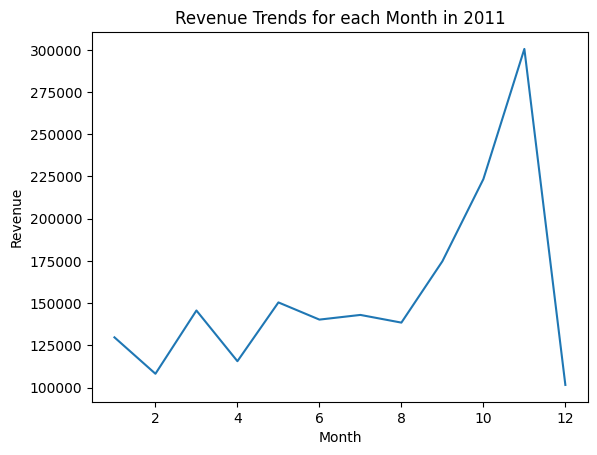

In [15]:
# Filter data for the year 2011
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Convert InvoiceDate column to datetime if needed
df_2011['InvoiceDate'] = pd.to_datetime(df_2011['InvoiceDate'])

# Create Month column
df_2011['Month'] = df_2011['InvoiceDate'].dt.month

# Calculate total revenue for each month
revenue_by_month = df_2011.groupby('Month')['UnitPrice'].sum()

# Visualize revenue trends
plt.plot(revenue_by_month.index, revenue_by_month.values)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue Trends for each Month in 2011')
plt.show()


# Monthly revenue for the year 2011

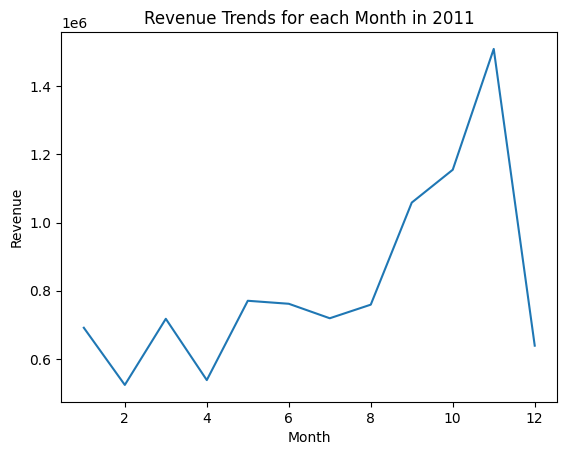

Average revenue for the first 8 months: $ 685134.99
Increase in revenue from August to September: 39.45%
Highest revenue month: 11
Revenue in 11 : $ 1509496.33
Conclusion: Seasonality impacts retail store sales, with exceptional growth observed from September to November.


In [16]:
# Calculate total revenue for each month in 2011
revenue_by_month = df_2011.groupby(df_2011['InvoiceDate'].dt.month)['revenue'].sum()

# Visualize revenue trends
plt.plot(revenue_by_month.index, revenue_by_month.values)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue Trends for each Month in 2011')
plt.show()

# Verify CEO's inquiry
average_revenue_first_8_months = revenue_by_month[:8].mean()
increase_percentage_september = (revenue_by_month[9] - revenue_by_month[8]) / revenue_by_month[8] * 100
highest_revenue_month = revenue_by_month.idxmax()
highest_revenue_value = revenue_by_month.max()

print("Average revenue for the first 8 months: $", round(average_revenue_first_8_months, 2))
print("Increase in revenue from August to September: {:.2f}%".format(increase_percentage_september))
print("Highest revenue month:", highest_revenue_month)
print("Revenue in", highest_revenue_month, ": $", highest_revenue_value)
print("Conclusion: Seasonality impacts retail store sales, with exceptional growth observed from September to November.")


# Top 10 Countries that generate the highest revenue

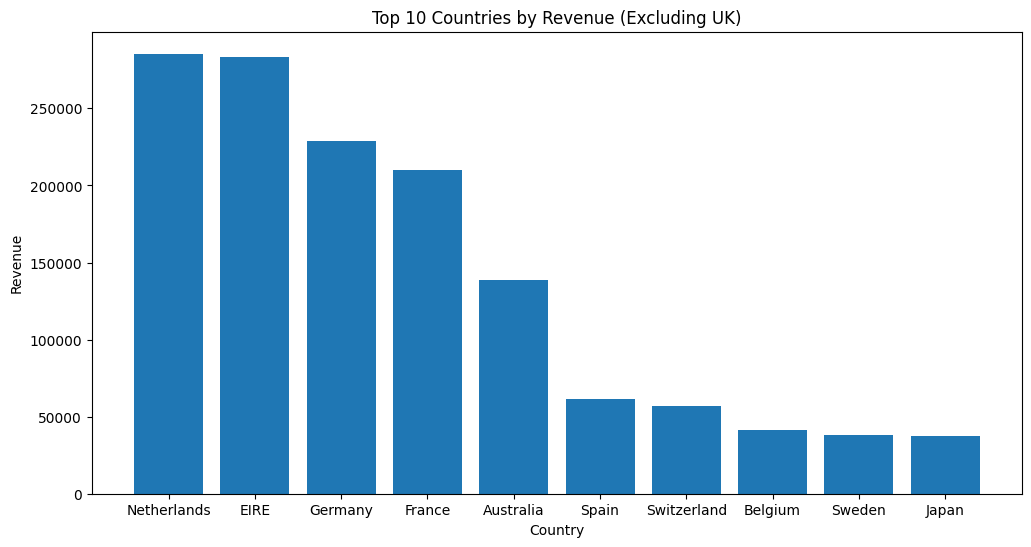

       Country  Quantity    Revenue
0  Netherlands    200937  285446.34
1         EIRE    147447  283453.96
2      Germany    119263  228867.14
3       France    112104  209715.11
4    Australia     84209  138521.31
5        Spain     27951   61577.11
6  Switzerland     30630   57089.90
7      Belgium     23237   41196.34
8       Sweden     36083   38378.33
9        Japan     26016   37416.37
Analysis: Focus on countries excluding the UK to capture growth opportunities.


In [17]:
# Filter data excluding United Kingdom
df_countries = df[df['Country'] != 'United Kingdom']

# Calculate total revenue and quantity sold for each country
revenue_by_country = df_countries.groupby('Country')['revenue'].sum()
quantity_by_country = df_countries.groupby('Country')['Quantity'].sum()

# Sort the data by revenue in descending order
revenue_by_country = revenue_by_country.sort_values(ascending=False)

# Select the top 10 countries
top_10_countries = revenue_by_country.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Top 10 Countries by Revenue (Excluding UK)')
plt.show()

# Print the quantity sold along with the revenue generated for the top 10 countries
top_10_quantity = quantity_by_country.loc[top_10_countries.index]
top_10_revenue = revenue_by_country.loc[top_10_countries.index]
top_10_data = pd.DataFrame({'Country': top_10_quantity.index, 'Quantity': top_10_quantity.values, 'Revenue': top_10_revenue.values})
print(top_10_data)

# Verify focus on growth opportunities
print("Analysis: Focus on countries excluding the UK to capture growth opportunities.")


# Top 10 customers by revenue

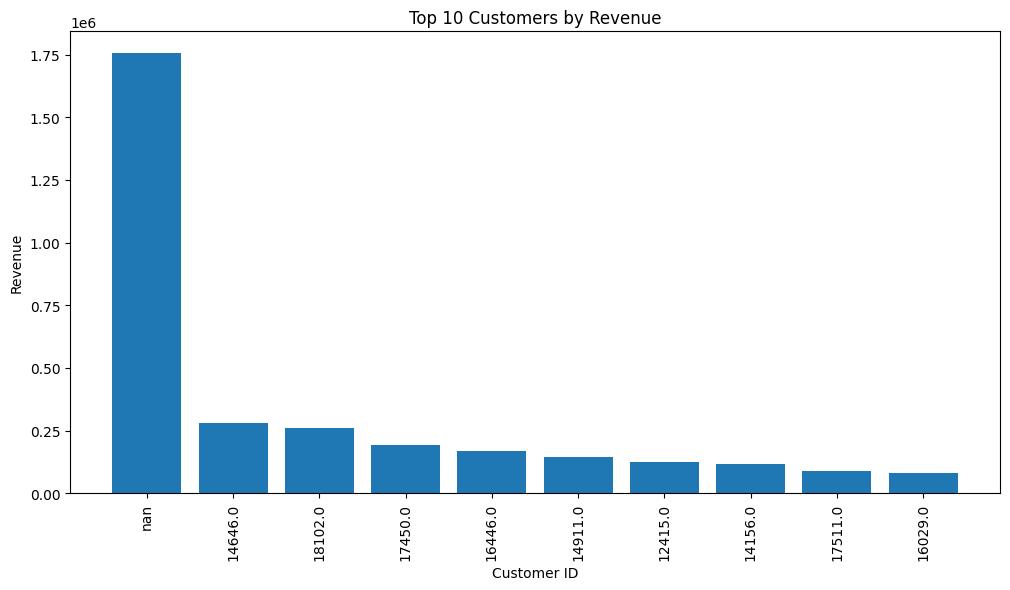

Analysis: The top customer generated 526.42% more revenue than the second-highest, indicating low customer bargaining power and a diversified customer base.


In [24]:
# Calculate total revenue for each customer
revenue_by_customer = df.groupby('CustomerID')['revenue'].sum()

# Remove the customer with ID 'nan'
revenue_by_customer = revenue_by_customer.dropna()

# Sort the data by revenue in descending order
revenue_by_customer = revenue_by_customer.sort_values(ascending=False)

# Select the top 10 customers
top_10_customers = revenue_by_customer.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_customers.index, top_10_customers.values)
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.title('Top 10 Customers by Revenue')
plt.xticks(rotation=90)
plt.show()

# Verify customer purchasing behavior
highest_revenue_customer = top_10_customers.index[0]
second_highest_revenue_customer = top_10_customers.index[1]
revenue_difference = revenue_by_customer[highest_revenue_customer] - revenue_by_customer[second_highest_revenue_customer]
percentage_difference = (revenue_difference / revenue_by_customer[second_highest_revenue_customer]) * 100

print("Analysis: The top customer generated {:.2f}% more revenue than the second-highest, indicating low customer bargaining power and a diversified customer base.".format(percentage_difference))


# Demand for Products by Country (Top 10)

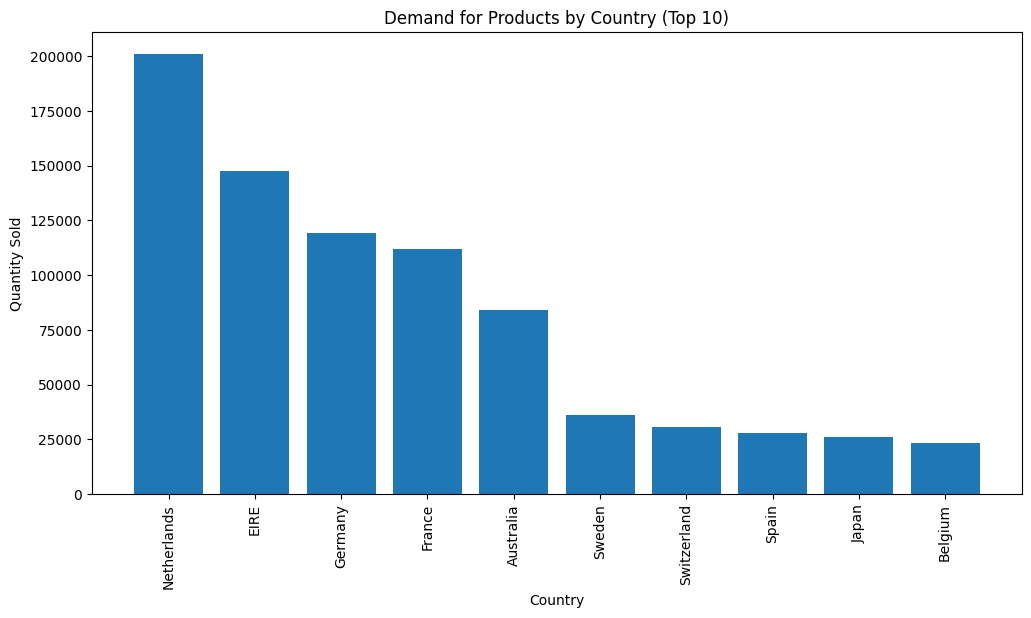

Analysis: Focus on high-revenue regions such as Netherlands, Ireland, Germany, France, Australia to increase demand for products. Develop a new strategy targeting low-demand regions like Africa, Asia, Russia to boost sales revenues and profitability.


In [25]:
# Filter data excluding United Kingdom
df_countries = df[df['Country'] != 'United Kingdom']

# Calculate total revenue and quantity sold for each country
revenue_by_country = df_countries.groupby('Country')['revenue'].sum()
quantity_by_country = df_countries.groupby('Country')['Quantity'].sum()

# Sort the data by revenue in descending order
revenue_by_country = revenue_by_country.sort_values(ascending=False)

# Select the top 10 countries
top_10_countries = revenue_by_country.head(10)

# Filter the data for the top 10 countries
df_top_10_countries = df_countries[df_countries['Country'].isin(top_10_countries.index)]

# Calculate total quantity sold for each country
quantity_by_country = df_top_10_countries.groupby('Country')['Quantity'].sum()

# Sort the data by quantity in descending order
quantity_by_country = quantity_by_country.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(quantity_by_country.index, quantity_by_country.values)
plt.xlabel('Country')
plt.ylabel('Quantity Sold')
plt.title('Demand for Products by Country (Top 10)')
plt.xticks(rotation=90)
plt.show()

# Verify focus on high-revenue regions
high_revenue_regions = ['Netherlands', 'Ireland', 'Germany', 'France', 'Australia']
low_demand_regions = ['Africa', 'Asia', 'Russia']
print("Analysis: Focus on high-revenue regions such as", ", ".join(high_revenue_regions), "to increase demand for products. Develop a new strategy targeting low-demand regions like", ", ".join(low_demand_regions), "to boost sales revenues and profitability.")
